## Exploratory Data Analysis on House Price Prediction by Simran Goyal

The aim of this report is to predict the house prices based on various parameters.
Our main objective here is to define a report consisting of *Data Visualisation* using various libraries like Seaborn and Matplotlib. Here, we will visualise and predict the house sales using the test data.

The parameters used in this data set are very general and relatable. The various parameters considered in this data set are- the condition of the house, the location of the house, what is the actual market value, how many bedrooms does it have etc.

In [39]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Data Description

The data used here is in csv format.
A CSV (Comma-Separated Values) file stores data in a tabular format consisting of rows and columns. The data in every row is separated by commas. It looks like a database or a spreadsheet.

This data is produced in Washington (can identify this due to the zip codes in the data set).
The data set used here will be helpful for us to predict the house sales based on the different parameters like- when was it first bought, how many bathrooms does it have, how much is the area covered by the house, what is the condition of the house etc. This is a general data set, that is observed and collected on various different parameters. Mostly parameters are continuous in nature except the condition and grade of the house, which are ordinal.

### Attribute Information

The various attributes on which the data is observed are:

1. Date it was bought on
3. The market value
4. Number of bedrooms
5. Number of bathrooms
6. The living area in sqft
7. The lot area in sqft
8. The condition of the house
9. The year it was built in
10. The year it was renovated in
11. The zipcode of the area
12. The latitude
13. The longitude

And many more parameters which we will observe and analyse in this report.

![House](https://github.com/simrang02/house_price_prediciton_eda/blob/master/download.jpg?raw=1)

In [3]:
# Importing the required libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

Let us view the data in a dataframe format.

We use the head function to view the first five rows of the data set.

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/simrang02/house_price_prediciton_eda/master/data.csv')
pd.options.display.max_columns = None
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We will now observe the shape of the data set using the shape property, which tells us about the rows and columns in the data set.

In [7]:
df.shape

(4999, 21)

We will now observe the size of the data set using the size property, which tells us about the total number of records in the data set.

In [8]:
df.size

104979

We will now describe the data set using the describe function which tells us about the statistical data related to the data set.

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.999000e+03,4.999000e+03,4999.000000,4999.000000,4999.000000,4.999000e+03,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,4.630463e+09,5.394683e+05,3.371074,2.062062,2061.009002,1.616135e+04,1.432587,0.009402,0.243049,3.454691,7.595319,1753.217644,307.791358,1966.670934,95.071814,98078.807762,47.559286,-122.215837,1976.980596,13453.039208
std,2.871064e+09,3.873502e+05,0.910199,0.773645,923.817822,4.600649e+04,0.510843,0.096516,0.774712,0.677408,1.166624,818.459143,456.596502,28.280606,425.275345,54.130665,0.139523,0.141808,674.735573,26517.070037
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.152650e+09,3.178125e+05,3.000000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1949.000000,0.000000,98033.000000,47.463550,-122.329000,1490.000000,5396.000000
50%,4.022900e+09,4.490000e+05,3.000000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1968.000000,0.000000,98070.000000,47.572800,-122.235000,1820.000000,7800.000000
75%,7.345155e+09,6.500000e+05,4.000000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679150,-122.129000,2340.000000,10469.500000
max,9.842300e+09,7.060000e+06,9.000000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,3000.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


We will now check if our data set contains any null values or not.

In [10]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

This shows that there is no null value present in the data set.

# Univariate Analysis

'Uni' stands for One. This means that the analysis is done considering one variable. This is the simplest method of analysis.
Univariate analysis is used to describe the data and observe the pattern. Hence, it is also helpful during the bivariate or multivariate analysis.

## Price- Histogram

Here is the histogram for the market price of the houses:

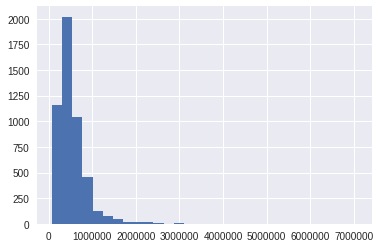

In [11]:
plt.hist(x = 'price', data = df, bins = 30)
sns.despine()

From the above histogram, we can observe:
1. There is skewness in the above distribution.
2. The above data is continuous in nature.
3. The market value of most of the houses is less than 1000000.
4. There are some outliers present in the above graph.

## Bedroom- Count plot

Here is the count plot for the number of bedrooms in the house:

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


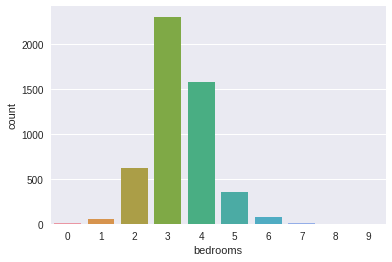

In [12]:
sns.countplot(x = 'bedrooms', data = df)
sns.despine()

From the above count plot, we can infer:
1. The houses with 3 and 4 bedrooms are high in number.
2. There are even houses with 0 bedrooms and some people prefer them because of low prices.
3. Houses with 4 and less bedrooms are high in number, as compared to the houses with more number of bedrooms as the price varies and maintaining such big houses is difficult.

## Bathroom- Count plot

Here is the count plot for the number of bathrooms in the house:

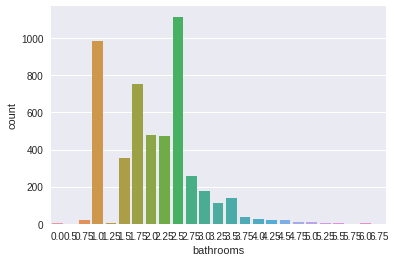

In [13]:
sns.countplot(x = 'bathrooms', data = df)
sns.set(rc={'figure.figsize':(11.7,8.27)})

From the above count plot, we can infer:

1. The houses having 1-3 bathrooms are high in number.
2. There are very less number of houses which have number of bathrooms more than 4.

## Living area(in sqft)- Histogram

Here is the histogram for the living area (in sqft) in the house:

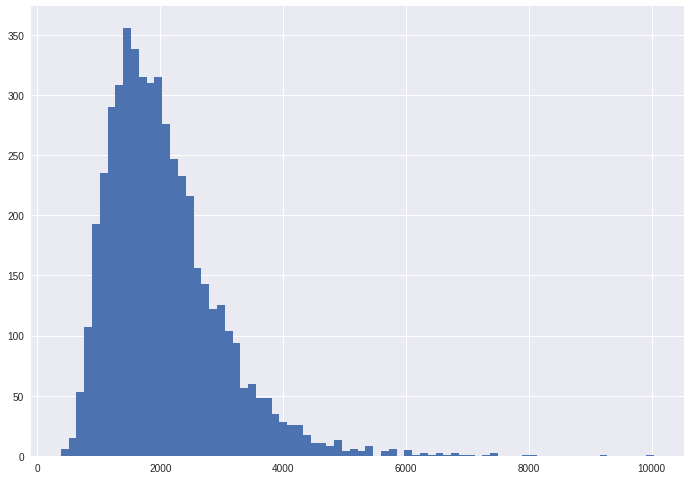

In [14]:
plt.hist(x = 'sqft_living', data = df, bins = 'auto')
sns.despine()

From the above histogram, we can infer:

1. The above distribution is skewed.
2. There are a number of outliers present.
3. The distribution is continuous in nature.
4. Living area of most of the houses is less that 4000 sqft.

## Lot area(in sqft)- Histogram
Here is the histogram for the lot area (in sqft) in the house:

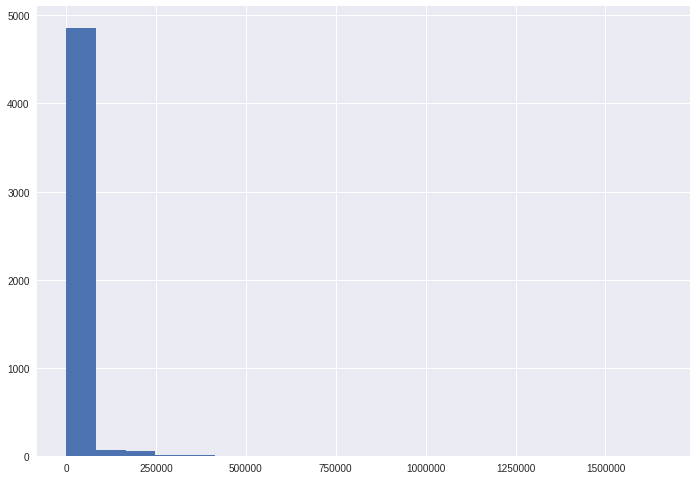

In [15]:
plt.hist(x = 'sqft_lot',data=df,bins=20)
sns.despine()

From the above histogram, we can infer:

1. The plot is skewed in nature.
2. Most of the houses have a lot area much less than 250000 sqft.
3. There are outliers in the distribution.

## Floors- Count plot

Here is the count plot for number of floors in the house:

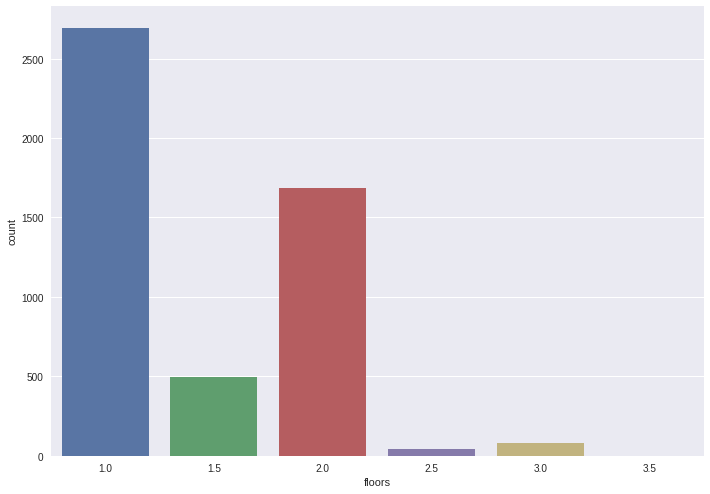

In [16]:
sns.countplot(x = 'floors', data = df)
sns.despine()

From the above count plot, we can infer:

1. The above distribution is continuous in nature.
2. Most houses have 1-2 floorings in their house.

## Waterfront- Count plot

Here is the count plot for waterfront in the house:

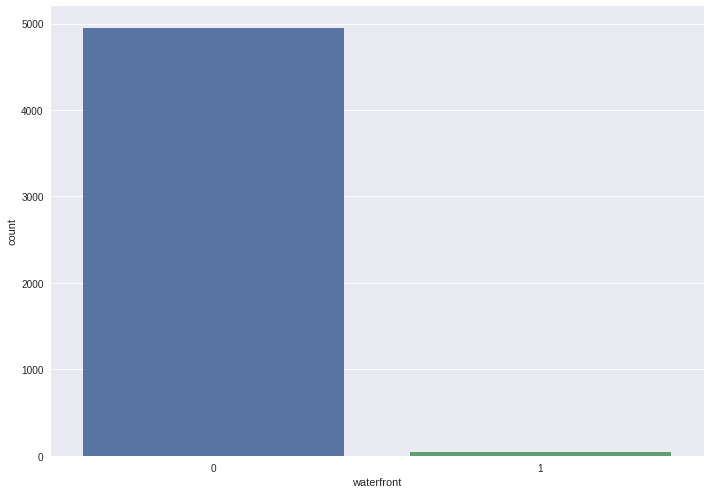

In [17]:
sns.countplot(x = 'waterfront', data = df)
sns.despine()

From the above countplot, we infer:

1. There are only two cases in the above distribution- either the houses have a waterfront or they don't have it.
2. Most of the houses don't have a waterfront.
3. There are few houses that have a waterfront in it.

## View- Count Plot

Here is the count plot for the number of views around the house:

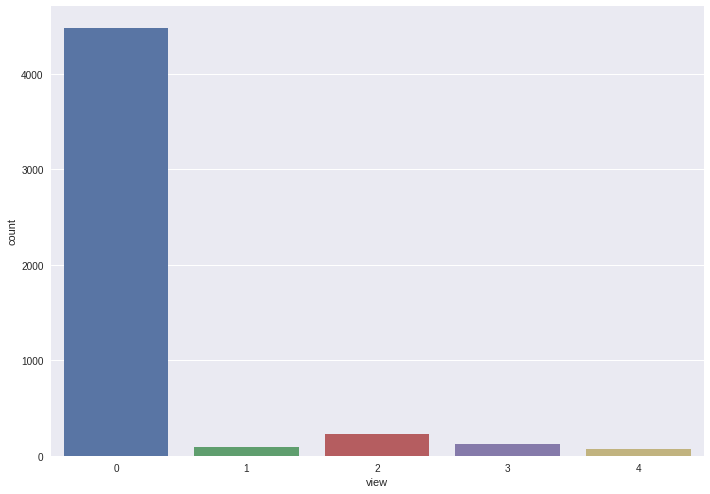

In [18]:
sns.countplot(x = 'view', data = df)
sns.despine()

From the above count plot, we infer:

1. The above distribution shows that the number of houses having 0 views around it is high in number.
2. The houses having 2 views around it are high in number than 1, 3 or 4 views.

## Condition- Count Plot

Here is the count plot stating the condition of the house:

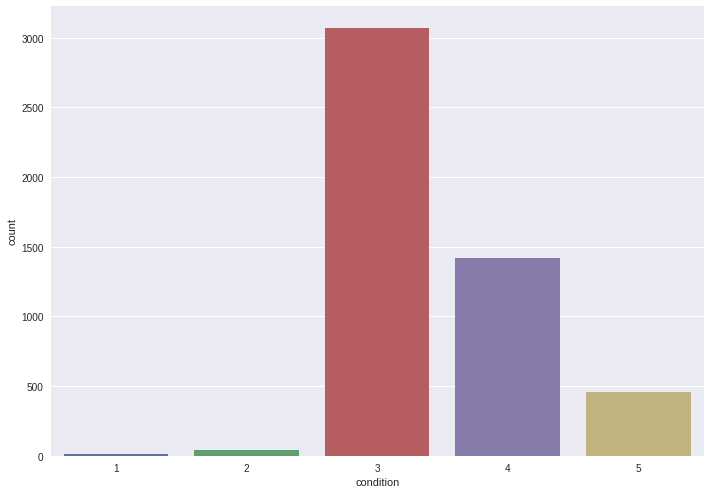

In [19]:
sns.countplot(df['condition'])
sns.despine()

From the above count plot, we infer:

1. The above data is ordinal in nature.
2. The condition of most of the houses is mediocre.
3. The houses with a bad condition are very less in number as compared to the houses which are good in condition.

## Year built- Distribution Plot

Here is the distribution plot for the built year:

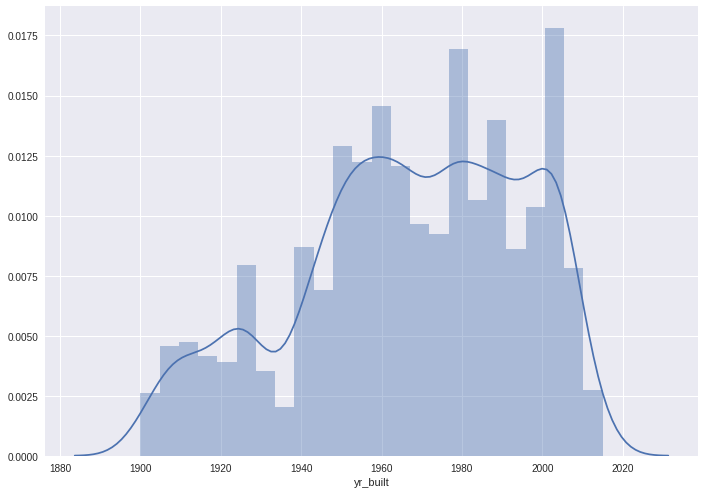

In [20]:
sns.distplot(df['yr_built'])
sns.despine()

From the above distribution plot, we infer:

1. Most of the houses are built between 1960 to the present year.
2. The distribution is continuous.
3. There are no houses built before 1900, stating that no one is interested in buying such old houses.

## Zipcode- Histogram

Here is the histogram for the area zipcode:

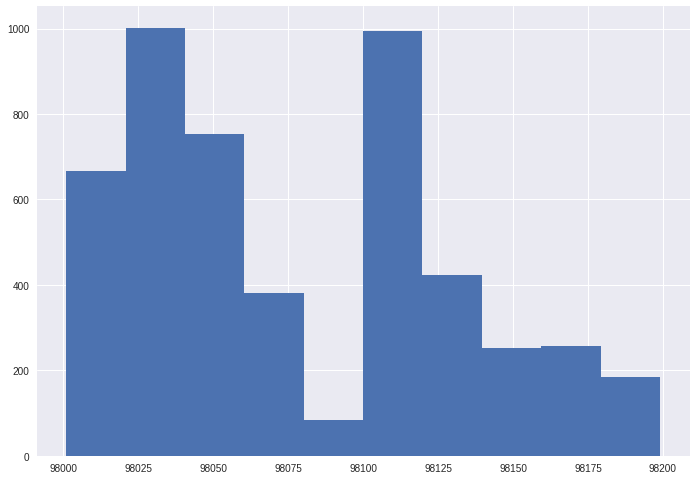

In [21]:
plt.hist(x = 'zipcode', data =df)
sns.despine()

From the above histogram, we infer:

1. The above data is continuous in nature.
2. Most of the houses are from some areas of Hobart and Seattle in Washington.
3. These houses are scattered across the district and we'll see if location affects the price of the houses or not.

## Latitude- Distribution Plot

Here is the distribution plot for the latitude:

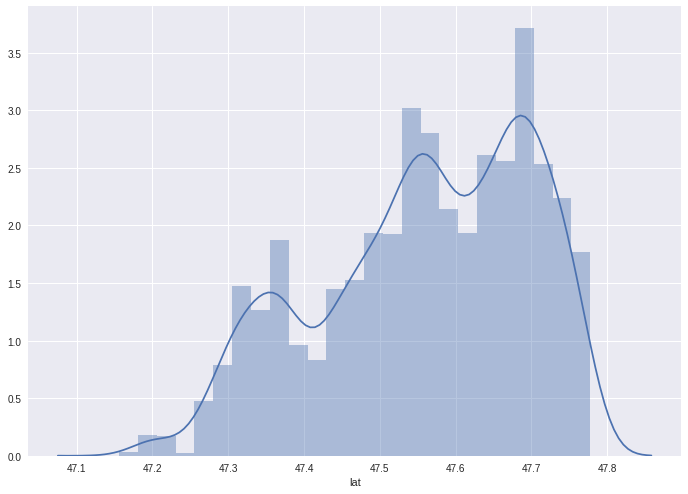

In [22]:
sns.distplot(df['lat'])
sns.despine()

From the above distribution plot, we infer:

1. The above distribution is skewed.
2. The data is continuous.
3. There are outliers present.
4. Most houses are present at a latitudinal scale of 47.5-47.7.

## Longitude- Distribution Plot

Here is the distribution plot for longitude:

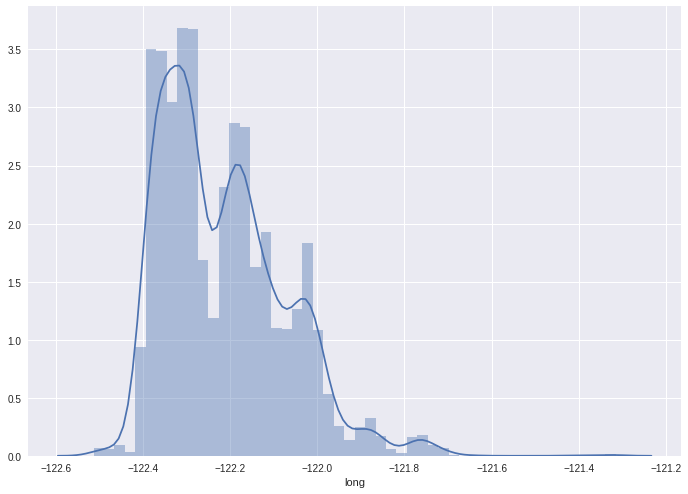

In [23]:
sns.distplot(df['long'])
sns.despine()

From the above distribution plot, we infer:

1. The above distribution is skewed.
2. The data is continuous.
3. There are outliers present.
4. Most houses are present at a longitudinal scale of-122.4 to -122.0.

# Bivariate Analysis

'Bi' stands for Twp. This means that the analysis is done considering two variables. It is the simultaneous analysis of two variables. It tells us about the dependencies, association and relation between these two specific variables. After analysing their relation, we can infer the level of their dependencies on each other.

We will now analyses the co-relation between all the considered parameters

In [24]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.012920,0.004671,0.003985,0.004903,-0.131029,-0.005283,-0.007107,0.030861,-0.019601,0.019183,-0.001772,0.013096,0.011981,-0.000168,0.002716,0.012427,-0.010175,-0.001990,-0.149301
price,0.012920,1.000000,0.300539,0.520994,0.699535,0.070586,0.275792,0.339532,0.407727,0.052675,0.648340,0.606242,0.328645,0.032269,0.136781,-0.055665,0.299440,0.006053,0.589159,0.079824
bedrooms,0.004671,0.300539,1.000000,0.530517,0.578598,0.019030,0.216467,-0.007836,0.081476,0.015430,0.372078,0.474826,0.319523,0.155584,0.021611,-0.150284,0.003482,0.101539,0.391102,0.021721
bathrooms,0.003985,0.520994,0.530517,1.000000,0.761931,0.068677,0.489385,0.092667,0.204417,-0.081345,0.667719,0.683548,0.316317,0.468854,0.068955,-0.205176,0.033648,0.208281,0.590598,0.094537
sqft_living,0.004903,0.699535,0.578598,0.761931,1.000000,0.134826,0.388956,0.134882,0.291213,-0.035385,0.759091,0.869476,0.464715,0.313054,0.059068,-0.188232,0.069676,0.200554,0.758331,0.180853
sqft_lot,-0.131029,0.070586,0.019030,0.068677,0.134826,1.000000,0.003889,0.034226,0.061672,-0.017890,0.082899,0.158610,-0.011523,0.071996,0.003335,-0.127287,-0.076371,0.213364,0.148166,0.665399
floors,-0.005283,0.275792,0.216467,0.489385,0.388956,0.003889,1.000000,0.051409,0.049751,-0.210904,0.460154,0.569862,-0.234527,0.395634,0.035119,-0.080910,0.046276,0.154808,0.324582,0.017181
waterfront,-0.007107,0.339532,-0.007836,0.092667,0.134882,0.034226,0.051409,1.000000,0.437709,0.029469,0.101321,0.113182,0.070022,-0.011987,0.094876,0.014516,-0.017389,-0.044362,0.102837,0.036608
view,0.030861,0.407727,0.081476,0.204417,0.291213,0.061672,0.049751,0.437709,1.000000,0.058160,0.245659,0.172111,0.280689,-0.048494,0.124905,0.075129,0.004074,-0.088105,0.281550,0.043319
condition,-0.019601,0.052675,0.015430,-0.081345,-0.035385,-0.017890,-0.210904,0.029469,0.058160,1.000000,-0.115742,-0.136399,0.172905,-0.318280,-0.079890,-0.002063,-0.006851,-0.118736,-0.072626,-0.014909


We use heatmap to plot the relation between the various parameters.
The positive values show direct relation whereas the negative values represent opposite or indirect relation.

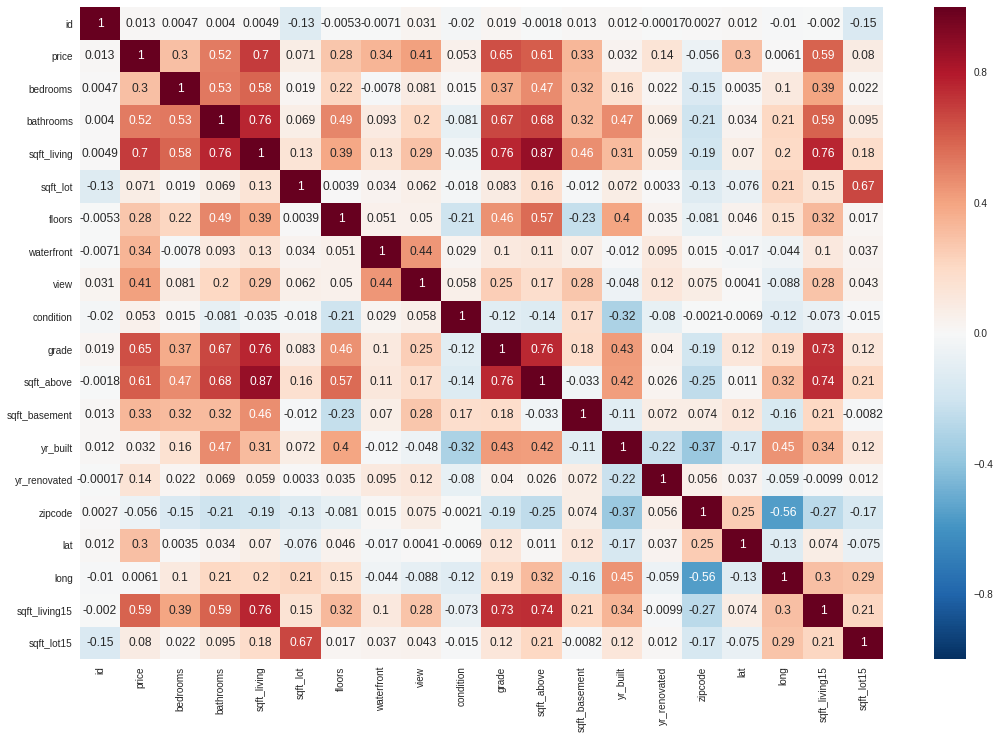

In [25]:
plt.figure(figsize =(18,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Price vs Living Area(sqft)- Reg Plot

Here is the regression plot for price vs living area(sqft):

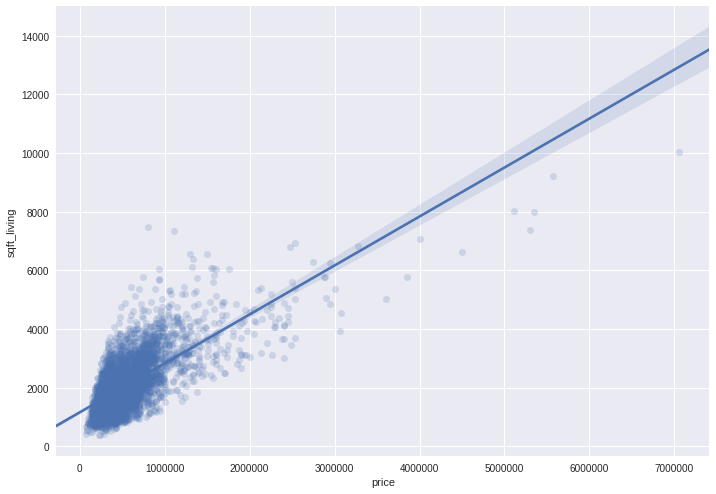

In [26]:
sns.regplot(x = 'price',y = 'sqft_living',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2})
sns.despine()

From the above regression plot, we infer:

1. The houses having living area less than 4000 sqft have prices less than 1000000.
2. The above distibution shows that as the living area increases the price of the house is also increasing.
3. This shows that there exists a direct relation of living area with the price of the house.

## Bedrooms vs Price- Reg Plot

Here is the regression plot for number of bedrooms vs price:

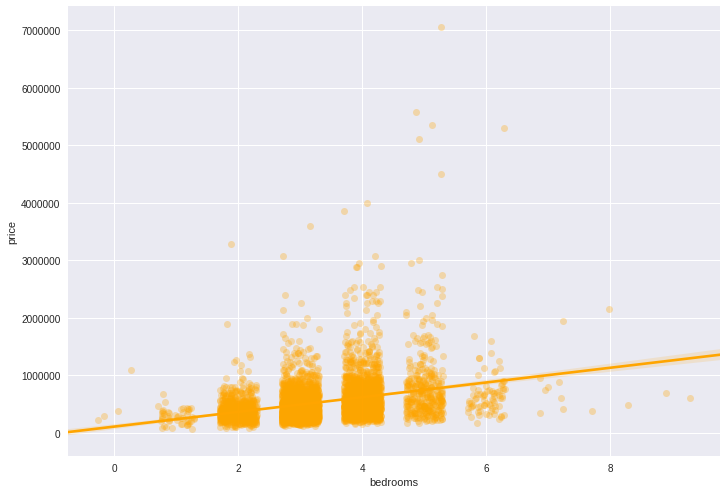

In [27]:
sns.regplot(x = 'bedrooms',y='price',data = df , x_jitter=0.3, scatter_kws={'alpha':0.3}, color = 'orange')
sns.despine()

From the above regression plot, we infer:

1. Most houses have 2-5 bedrooms in their house.
2. The prices of most of the houses is less than 1000000 with respect to the number of houses.
3. The price of the house and the number of bedrooms are dependent on each other.

## Price vs Latitude- Reg Plot

Here is the regression plot for price vs latitude:

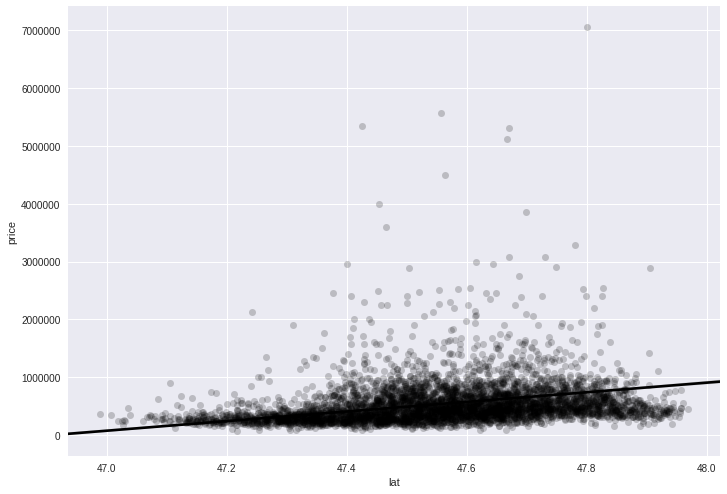

In [28]:
sns.regplot(x = 'lat',y = 'price',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='black')
sns.despine()

From the above regression plot, we infer:

1. There exists a direct relation between the price and the latitudinal location of the house.
2. The houses located between 47.4and 47.8 latitude are high in number in the data set.
3. The houses located at 47.0-47.2 latitude are cheaper than the houses present between 47.4-47.8 latitude.

## Price vs Longitude- Reg Plot

Here is the regression plt for price vs longitude:

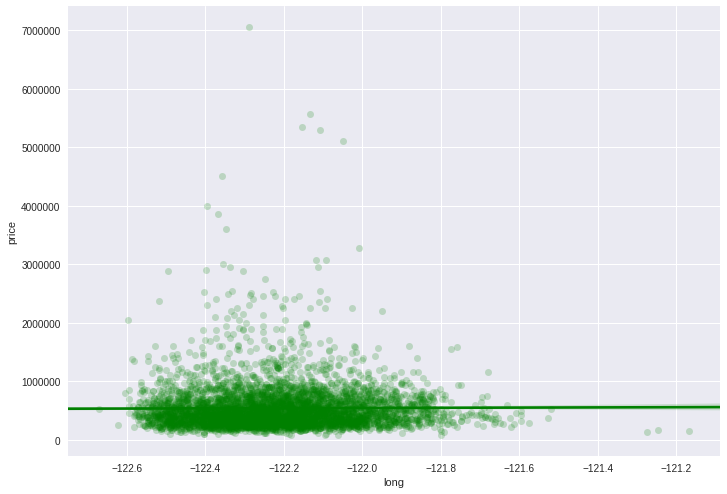

In [29]:
sns.regplot(x = 'long',y = 'price',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='green')
sns.despine()

From the above regression plot, we infer:

1. There exists a direct relation between the price and the longitudinal location of the house.
2. The houses located between -122.4 to -122.0 longitude are high in number in the data set.
3. The houses located between -122.6 to -122.4 longtiude are cheaper than the houses present between -122.4 to -122.0 longitude.

## Condition vs Built Year- Reg Plot

Here is the regression plot for condition vs built year:

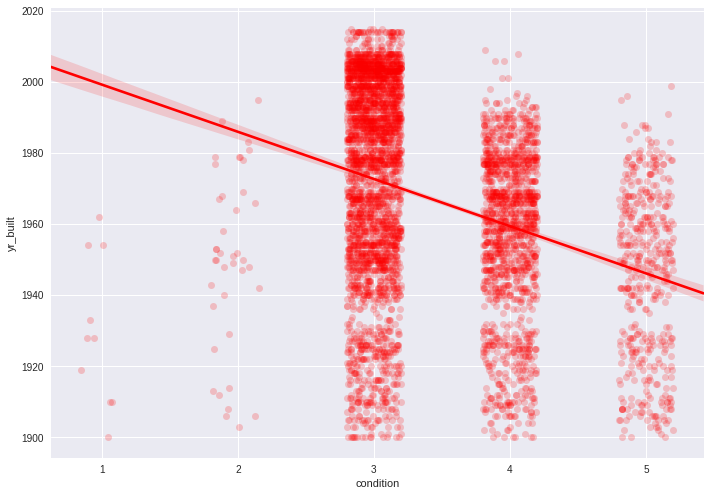

In [30]:
sns.regplot(x = 'condition',y = 'yr_built',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='red')
sns.despine()

From the above regression plot, we infer:

1. It shows the indirect relation between the condition of the house to the year it was built in.
2. Most of the houses built after 2000 are in good condition.
3. The plot shows that the houses with bad condition are mostly built before 1980.

## Price vs View- Box Plot

Here is the boxplot for price vs view:

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


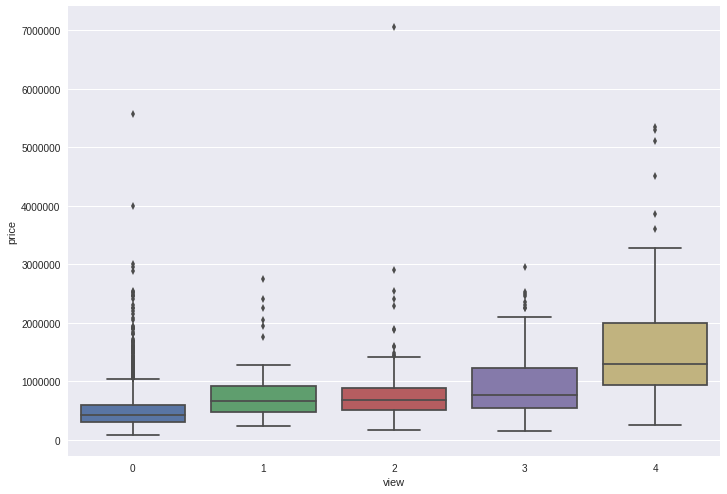

In [31]:
sns.boxplot(x = 'view',y = 'price',data = df )
sns.despine()

From the above boxplot, we infer:

1. There exists a direct relation between the price and the view around the house.
2. The houses with 0 views around it are having mostly a price of 1000000.
3. The houses having more views around have more price compared to the houses with less price.

## Price vs Waterfront- Box Plot

Here is the boxplot for price vs waterfront:

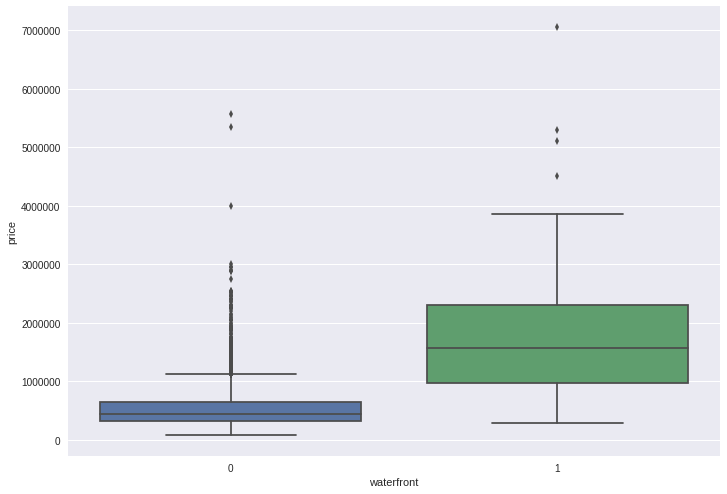

In [32]:
sns.boxplot(x = 'waterfront',y = 'price',data = df)
sns.despine()

From the above boxplot, we infer:

1. There exists a direct relation between the price and the waterfront in the house.
2. Most of the houses don't have a waterfront in it.
3. The houses with waterfront in it have high prices rather than the houses with no waterfront in it.

# Multivariate Analysis

'Multi' stands for Many. This means that the analysis is done considering more than two variables. It is the simultaneous analysis of many variables. It tells us about the dependencies, association and relation between the variables. After analysing their relation, we can infer the level of their dependencies on each other.

Our main aim of this analysis is to predict the price of the houses for sale. Hence, we will analyses evey aspect in terms of price here.

## Bedrooms vs Price in terms of Condition- Facet grid

Here is the facet grid for price vs bedrooms in terms of the condition:

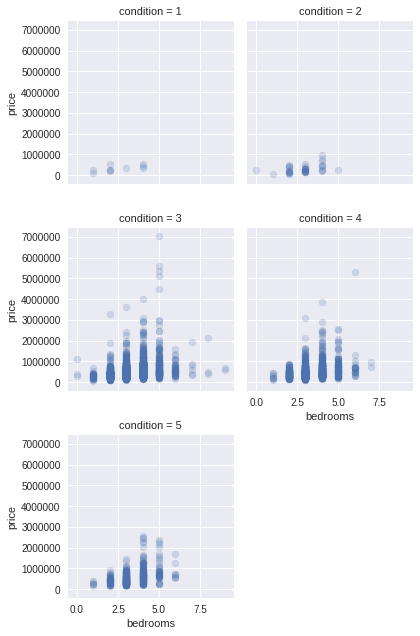

In [33]:
grid = sns.FacetGrid(df, col='condition',col_wrap=2)
grid.map(plt.scatter,'bedrooms','price',alpha = 0.2)
sns.despine()

From the above graphs, we infer:

1. More the number of bedrooms, more the price of the house where the condition is good.
2. For the houses having bad condition, even the houses with more number of bedrooms possess low price of the house.

## Price vs Living Area in terms of Condition- Facet Grid

Here is the facet grid for price vs living area in terms of condition:

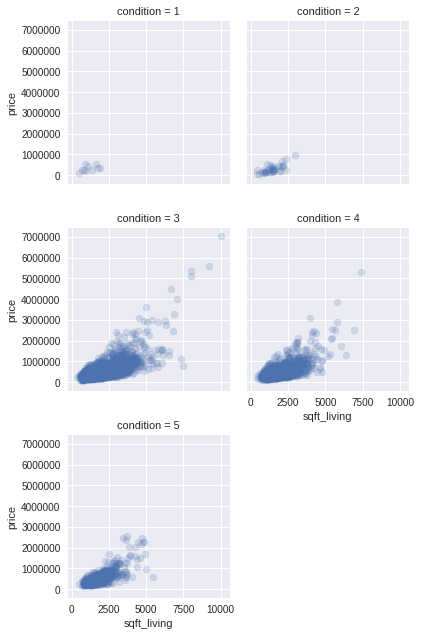

In [34]:
grid = sns.FacetGrid(df, col='condition',col_wrap=2)
grid.map(plt.scatter,'sqft_living','price',alpha = 0.2)
sns.despine()

From the above graphs, we infer:

1. The houses having bad condition are having less prices, irrespective of the living area of the houses.
2. The price of the houses increase with the living area of the houses, in the case of houses having good condition.

## Price vs View in terms of Condition- Facet Grid

Here is the facet grid for price vs view in terms of condition:

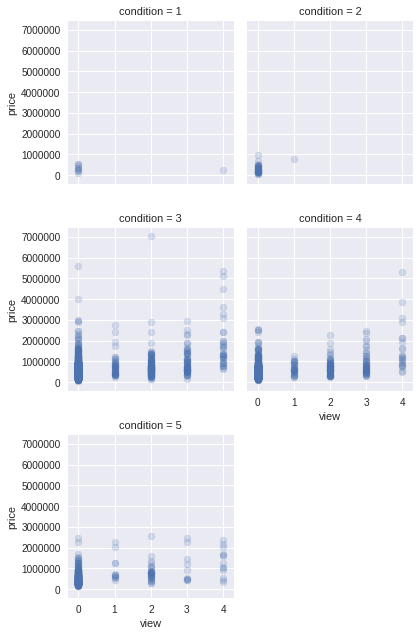

In [35]:
grid = sns.FacetGrid(df, col='condition',col_wrap=2)
grid.map(plt.scatter,'view','price',alpha = 0.2)
sns.despine()

From the above graphs, we infer:

1. The houses with bad condition are mostly having less views and hence, the prices are also less.
2. The houses having good condition, have high prices and even have more views around.
3. More the number of views around, more the price of the house.

# Final Plot Section

This is the final section where three plots are added that are useful in predicting the price of the houses.

## Plot-1
## Price vs View- Box Plot

We have included this graph as views around the house plays a major role in depicting the prices of the house.
Here is the box plot for price vs view:

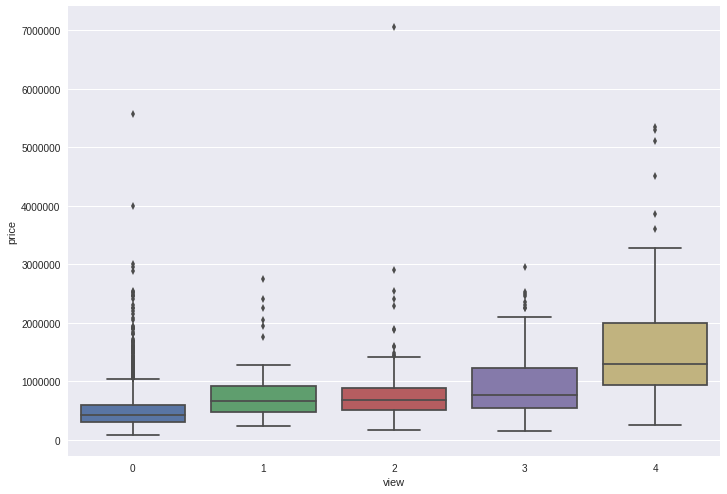

In [36]:
sns.boxplot(x = 'view',y = 'price',data = df )
sns.despine()

From the above box plot, we infer:

1. There exists a direct relation between the price and the view around the house.
2. The houses with 0 views around it are having mostly a price of 1000000.
3. The houses having more views around have more price compared to the houses with less price.

## Plot-2
## Built Year- Distribution Plot

We have included this plot as the built year helps us to price the houses well.
Here is the distribution plot for the built year:

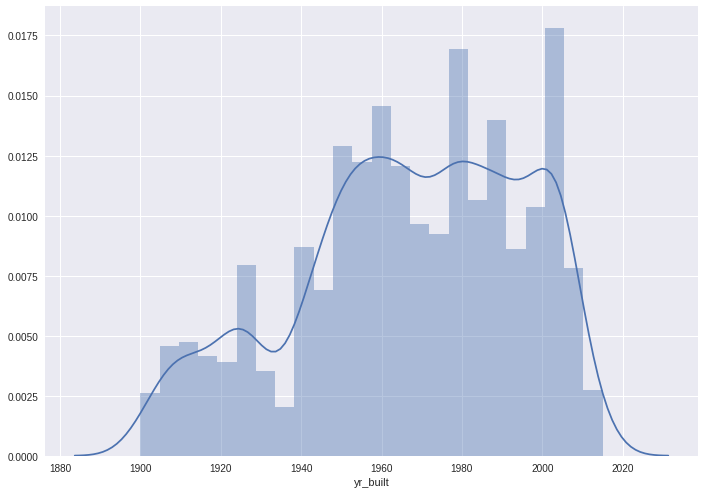

In [37]:
sns.distplot(df['yr_built'])
sns.despine()

From the above distribution plot, we infer:

1. Most of the houses are built between 1960 to the present year.
2. The distribution is continuous.
3. There are no houses built before 1900, stating that no one is interested in buying such old houses.

## Plot-3
## Living Area vs Price in terms of Condition- Facet Grid

We have included this plot as living area and the condition defines the price of the house well.
Here is the facet grid for price vs living area in terms of condition:

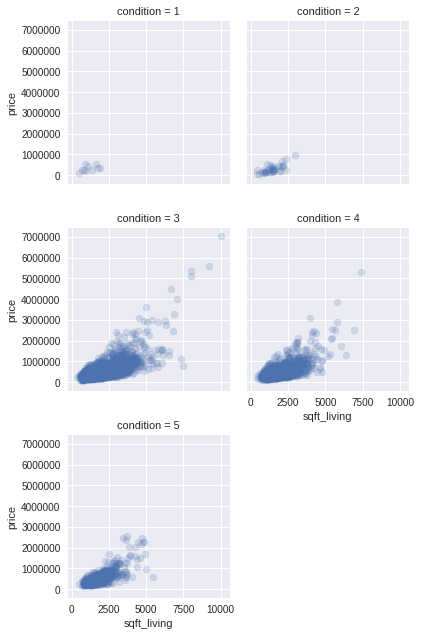

In [38]:
grid = sns.FacetGrid(df, col='condition',col_wrap=2)
grid.map(plt.scatter,'sqft_living','price',alpha = 0.2)
sns.despine()

From the above graphs, we infer:

1. The houses having bad condition are having less prices, irrespective of the living area of the houses.
2. The price of the houses increase with the living area of the houses, in the case of houses having good condition.

# Summary

From the above plots, we conclude that there are various parameters involved in determining the price of the houses.
Like:
1. Better the condition, more the price.
2. More the views arond, more the price.
3. More the number of bedrooms, more the price.
4. More the number of bathrooms, more the price.
5. More the living area, more the price.
6. Later the built year, more the price.
7. If waterfront, more the price.
8. If more lot area, more the price.

There are many such observations that one can see and infer from the above plots.

The problems faced here are that the parameters like floor is in decimals which is somewhat not possible and the house id which is of no use in predicting the price of the house.

So, we conclude that the price of a house can be predicted by the above defined parameters and plots.